<a href="https://colab.research.google.com/github/NabilNkhili/Doc_Structur-s/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

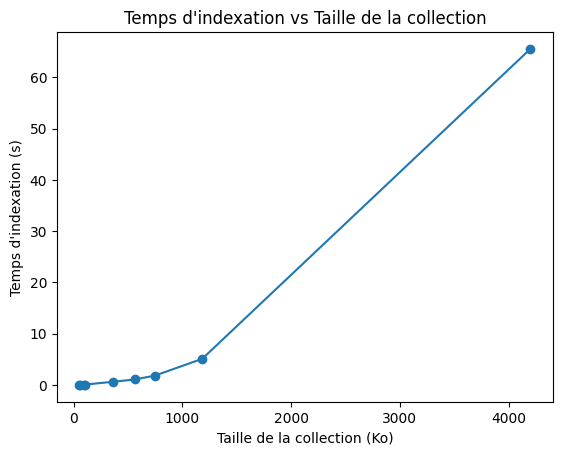

In [3]:
import os
import time
import gzip
from collections import defaultdict
import matplotlib.pyplot as plt

def tokenize(content):
    """Tokenisation simple : conversion en minuscules, suppression des caractères spéciaux."""
    return [word.lower() for word in content.split() if word.isalpha()]

def index_collection(file_path):
    """Indexe une collection à partir d'un fichier texte compressé (.gz)."""
    index = defaultdict(list)
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:  # Lecture des fichiers .gz
        for line_num, line in enumerate(file, start=1):
            terms = tokenize(line)
            for term in terms:
                if line_num not in index[term]:
                    index[term].append(line_num)
    return index

def measure_indexing_time(file_paths):
    """Mesure le temps d'indexation pour chaque fichier."""
    times = []
    sizes = []
    for file_path in file_paths:
        size = os.path.getsize(file_path) / 1024  # Taille en Ko
        start_time = time.time()
        index_collection(file_path)
        elapsed_time = time.time() - start_time
        sizes.append(size)
        times.append(elapsed_time)
    return sizes, times

# Exemple d'utilisation avec les fichiers
file_paths = [
    "01-Text_Only-Ascii-Coll-1-10-NoSem.gz",
    "02-Text_Only-Ascii-Coll-11-20-NoSem.gz",
    "03-Text_Only-Ascii-Coll-21-50-NoSem.gz",
    "04-Text_Only-Ascii-Coll-51-100-NoSem.gz",
    "05-Text_Only-Ascii-Coll-101-200-NoSem.gz",
    "06-Text_Only-Ascii-Coll-201-500-NoSem.gz",
    "07-Text_Only-Ascii-Coll-501-1000-NoSem.gz",
    "08-Text_Only-Ascii-Coll-1001-2000-NoSem.gz",
    "09-Text_Only-Ascii-Coll-2001-5000-NoSem.gz",
]
sizes, times = measure_indexing_time(file_paths)

# Génération du graphique
plt.plot(sizes, times, marker='o')
plt.xlabel("Taille de la collection (Ko)")
plt.ylabel("Temps d'indexation (s)")
plt.title("Temps d'indexation vs Taille de la collection")
plt.show()


In [5]:
import gzip

def compute_statistics(index, file_path):
    """Calcule les statistiques pour une collection."""
    total_terms = sum(len(postings) for postings in index.values())

    # Lecture du fichier compressé pour compter les documents
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        num_docs = sum(1 for _ in file)  # Nombre de lignes dans le fichier

    avg_doc_length = total_terms / num_docs if num_docs else 0
    avg_term_length = sum(len(term) for term in index.keys()) / len(index) if index else 0
    vocabulary_size = len(index)
    return avg_doc_length, avg_term_length, vocabulary_size

# Exemple avec un fichier
index = index_collection("01-Text_Only-Ascii-Coll-1-10-NoSem.gz")
avg_doc_length, avg_term_length, vocab_size = compute_statistics(index, "01-Text_Only-Ascii-Coll-1-10-NoSem.gz")

print(f"Longueur moyenne des documents: {avg_doc_length}")
print(f"Longueur moyenne des termes: {avg_term_length}")
print(f"Taille du vocabulaire: {vocab_size}")


Longueur moyenne des documents: 1.0967804125698863
Longueur moyenne des termes: 6.67190657983382
Taille du vocabulaire: 4453


In [6]:
def remove_stop_words(index, stop_words_file):
    """Supprime les mots vides de l'index."""
    with open(stop_words_file, 'r', encoding='utf-8') as file:
        stop_words = set(word.strip() for word in file)
    filtered_index = {term: postings for term, postings in index.items() if term not in stop_words}
    return filtered_index

# Exemple d'utilisation
stop_words_file = "stop-words-english4.txt"
index_without_stopwords = remove_stop_words(index, stop_words_file)

# Recalcul des statistiques après suppression des mots vides
avg_doc_length, avg_term_length, vocab_size = compute_statistics(index_without_stopwords, "01-Text_Only-Ascii-Coll-1-10-NoSem.gz")

print("\nAprès suppression des mots vides :")
print(f"Longueur moyenne des documents: {avg_doc_length}")
print(f"Longueur moyenne des termes: {avg_term_length}")
print(f"Taille du vocabulaire: {vocab_size}")



Après suppression des mots vides :
Longueur moyenne des documents: 0.6557419188998136
Longueur moyenne des termes: 6.8520256916996045
Taille du vocabulaire: 4048


In [7]:
pip install nltk


In [8]:
from nltk.stem import PorterStemmer

def apply_stemming(index):
    """Applique le stemming à l'index."""
    stemmer = PorterStemmer()
    stemmed_index = defaultdict(list)
    for term, postings in index.items():
        stemmed_term = stemmer.stem(term)  # Réduction à la racine
        if stemmed_term not in stemmed_index:
            stemmed_index[stemmed_term] = postings
        else:
            stemmed_index[stemmed_term].extend(postings)
            stemmed_index[stemmed_term] = list(set(stemmed_index[stemmed_term]))  # Suppression des doublons
    return stemmed_index

# Exemple d'utilisation
index_with_stemming = apply_stemming(index_without_stopwords)

# Recalcul des statistiques après stemming
avg_doc_length, avg_term_length, vocab_size = compute_statistics(index_with_stemming, "01-Text_Only-Ascii-Coll-1-10-NoSem.gz")

print("\nAprès application du stemming :")
print(f"Longueur moyenne des documents: {avg_doc_length}")
print(f"Longueur moyenne des termes: {avg_term_length}")
print(f"Taille du vocabulaire: {vocab_size}")



Après application du stemming :
Longueur moyenne des documents: 0.6497011760169655
Longueur moyenne des termes: 5.9251036116044995
Taille du vocabulaire: 3378


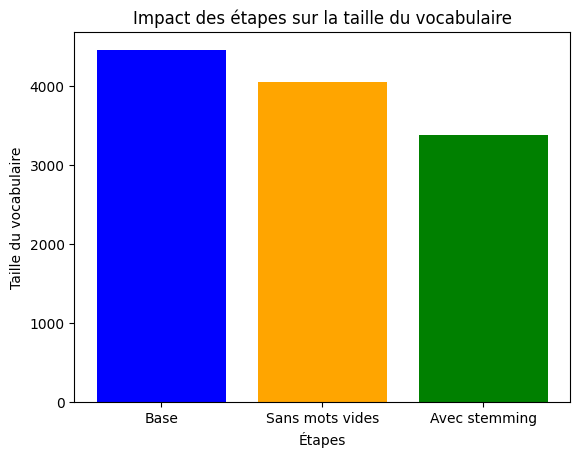

In [9]:
import matplotlib.pyplot as plt

vocab_sizes = []

# Index de base
vocab_sizes.append(len(index))

# Après suppression des mots vides
vocab_sizes.append(len(index_without_stopwords))

# Après stemming
vocab_sizes.append(len(index_with_stemming))

labels = ["Base", "Sans mots vides", "Avec stemming"]

# Génération du graphique
plt.bar(labels, vocab_sizes, color=['blue', 'orange', 'green'])
plt.xlabel("Étapes")
plt.ylabel("Taille du vocabulaire")
plt.title("Impact des étapes sur la taille du vocabulaire")
plt.show()


**Avant suppression des mots vides :**

Longueur moyenne des documents : 1.09

Cette valeur est élevée, ce qui signifie que les documents contiennent une grande quantité de termes non filtrés.

Longueur moyenne des termes : 6.67 caractères

Les termes incluent encore des mots vides et d'autres mots non significatifs.
Taille du vocabulaire : 4453

**Après suppression des mots vides :**

Longueur moyenne des documents : 0.65

----> Une réduction significative de la longueur moyenne indique que les mots vides occupaient une grande partie des documents.

Longueur moyenne des termes : 6.85 caractères

----> Légère augmentation due à la suppression des mots courts comme "a", "the", etc.

Taille du vocabulaire : 4048

----> Une réduction modérée de la taille du vocabulaire prouve que les stop-words contribuaient à l'inflation de l'index.

**Après application du stemming :**

Longueur moyenne des documents : 0.64

----> L'application du stemming n'a pas un grand impact sur la longueur moyenne des documents.

Longueur moyenne des termes : 5.92 caractères

----> Une diminution marquée indique que les mots ont été réduits à leurs racines (ex. : "running", "runner" → "run").

Taille du vocabulaire : 3378

----> Une réduction notable de la taille du vocabulaire montre que le stemming regroupe des termes similaires sous une seule forme.